In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#Use to import pandas
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np
#Use to import the file into google Colab drive
from google.colab import files 
#Use to import io, which opens the file from the Colab drive
import io




Mounted at /content/gdrive


In [ ]:
#KNN classifier using scikit learn that prints the accuracy
def KNN_classifier(array_data, array_label):

  data_train, data_validate, target_train, target_validate = train_test_split(array_data, array_label, test_size = 0.3)
  classifier = KNeighborsClassifier(n_neighbors=1)

  classifier.fit(data_train, target_train)

  predicted = classifier.predict(data_validate)
  accuracy = accuracy_score(target_validate, predicted)
  print(accuracy)

In [ ]:
#dimensionality reduction function

def myPCA(X):
  # This implementation assumes the input is N x M, where N is the number of features, and M is the number of training examples
  
#gets the number of features that a single training example has     (dimension of your featue space)
  N = X.shape[0] 

#gets the number of training examples in your input data
  M = X.shape[1]

#computes the mean of each feature in your feature space across all the training examples and reshapes it as a column vector with N rows
  mu = np.reshape( np.mean(X,axis=1) , [N,1] )

#computes matrix Z which is used when finding the covariance matrix to avoid summation
  Z = (1/np.sqrt(M)) * (X - mu)

#compares the number of features N to the number of training examples M
  if M > N:

#computes Z.Ztransponse and returns the corresponding eigen values and the unit eigen values
    lamb , W = np.linalg.eig( np.matmul(Z, np.transpose(Z)))

  else:
#computes Ztransponse.Z and returns the corresponding eigen values and the unit eigen values
    lamb , V = np.linalg.eig( np.matmul(np.transpose(Z), Z))

#multiplies the eigen vectors of Ztranspose.Z with Z
    W = np.matmul( Z , V)

#normalizes the eigen vectors since we're only interested in direction
    normFactor = np.sqrt( np.sum( np.square(W), axis=0))
    W = W / normFactor 
  
#returns an array of indices to sort the array of eigen values
  idx = np.argsort(lamb)
#sorts the array of eigen values in descending order      
  idx = idx[::-1]
  lamb = lamb[idx]
#sorts the eigen vector matrix according to the order of the corresponding eigen value
  W = W[:,idx]
#returns the sorted eigen vecor and eigen value and the mean
  return W , lamb, mu 

In [ ]:
train_data = pd.read_csv(r'/content/gdrive/My Drive/HW-4//HW-4/dataset/train_data.csv', header=None)

train_label = pd.read_csv(r'/content/gdrive/My Drive/HW-4//HW-4/dataset/train_labels.csv', header=None)

#retrieves and converts the dataframe to a numpy array
x_train = train_data.iloc[:, :]
y_train = train_label.iloc[:, :-1]

#converts the training data to a numpy array and stores it
array_data_train = x_train.to_numpy()
array_label_train = y_train.to_numpy()
array_label_train = array_label_train.ravel()


#stores the mean, eigen vector and eigen value matrices from the PCA function
eigen_vector_train, eigen_value_train, mean_train = myPCA(np.transpose(array_data_train))

print(np.shape(eigen_vector_train))
print(eigen_value_train[0])

#reshapes the eigen value array and 1, 100
eigen_value_train = np.reshape(eigen_value_train, [1, eigen_value_train.shape[0]])


(10000, 100)
28118532.839856558


c. I had 100 eigen vectors vectors each with a dimensionality of (9999, 1). Similarly, I had 100 eigen values and the highest eigen value is 28118532.839856558

In [ ]:
#computes the total sum of all the eigen_values returned
sum_eigen = np.sum(eigen_value_train)

eigen_spectrum = eigen_value_train/sum_eigen;

#graph of the eigen spectrum
x_axis = np.reshape(np.arange(1, eigen_value_train.shape[1] + 1), [1, 100])

y_axis = np.reshape(eigen_spectrum, [1, 100])

x_axis = x_axis[0]
y_axis = y_axis[0]
plt.plot(x_axis, y_axis, linewidth=2, c="red")

plt.title("Eigen Spectrum")
plt.xlabel("jth eigen vector")
plt.ylabel("Proportion of variance")
plt.show()


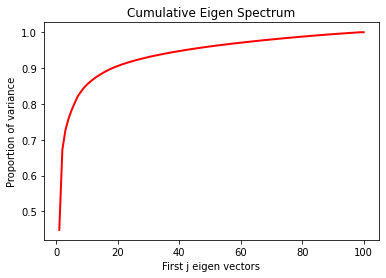

In [ ]:
#calculates the cumulative sum of the eigen spectrum array
cumulative_sum = np.cumsum(eigen_value_train/sum_eigen)

#graphs the cumulative eigen spectrum
x_axis = np.reshape(np.arange(1, eigen_value_train.shape[1] + 1), [1, 100])

y_axis = np.reshape(cumulative_sum, [1, 100])

x_axis = x_axis[0]
y_axis = y_axis[0]

plt.plot(x_axis, y_axis, linewidth=2, c="red")

plt.title("Cumulative Eigen Spectrum")
plt.xlabel("First j eigen vectors")
plt.ylabel("Proportion of variance")
plt.show()


In [ ]:
#computes and returns the minimum number of vectors needed to capture a certain proportion of the variance
def compute_vectors(energy_vector, percentage):
  cumulative_sum = np.cumsum(energy_vector)
  
  num_vectors = 1;
  while (cumulative_sum[num_vectors-1] < percentage):
    num_vectors += 1

  return num_vectors

In [ ]:
#computes and prints the minimum number of vectors needed to capture 90% of the variance
result = compute_vectors(eigen_value_train/sum_eigen, 0.9)

print(result)


19


In [ ]:
test_data = pd.read_csv(r'/content/gdrive/My Drive/HW-4//HW-4/dataset/test_data.csv', header=None)

test_label = pd.read_csv('/content/gdrive/MyDrive/HW-4//HW-4/dataset/test_labels.csv', header=None)

#retrieves and converts the dataframe to a numpy array
x_test = test_data.iloc[:, :-1]
y_test = test_label.iloc[:, [-1]]


array_data_test = x_test.to_numpy()
array_label_test = y_test.to_numpy()
array_label_test = array_label_test.ravel()

#extracts the first L eigen vectors
def reduce_dimension(L, W):
  w_prime = W[:, :L ]
  return w_prime;

#stores the mean, eigen vector and eigen value matrices from the PCA function
eigen_vector_test, eigen_value_test, mean_train = myPCA(np.transpose(array_data_test))


w_reduced = reduce_dimension(1, eigen_vector_test)

#computes the low dimensional representation of the training and test data
test_data_reduced = np.matmul(np.transpose(w_reduced), np.transpose(array_data_test))
train_data_reduced = np.matmul(np.transpose(w_reduced), np.transpose(array_data_test))

print(np.shape(test_data_reduced))
print(np.shape(train_data_reduced))

#KNN classifier for test data
KNN_classifier(array_data_test, array_label_test)

#KNN classifier for low dimensional test data
KNN_classifier(np.transpose(test_data_reduced), array_label_test)

(1, 100)
(1, 100)
0.6666666666666666
0.6666666666666666


By trying values of L between 1 and 20, I noticed that values of L between 15-20 provided the closest possible accuracy for the data which was closest to the result from part a.